<span style='color:gray'> <span style="font-size:25px;"> **DIRECT Permeability Predictive model**
    
In this Notebook, the machine learning model will be created and then the data from well-logs DLIS file [after preprocessing, sorting and finalizing the data] is loaded as input for Machine Learning model (ML); 
* Random Forest Regressor
* Gradient Boosting Regressor
    
    
For the prediction of petrophysical properties, such as porosity, permeability and water saturation, these two Regressor models **Random Forest Regressor** and **Gradient Boosting Regressor** are suitable.

They are Ensemble Based Tree Methods; they are based on the generation of Decision Trees.

We use Regression Models since we want to predict a continuous variable.

**Advantages** of the 2 regression models, since they are based on Decision Trees:

* They do not need the normalization or scaling of the original dataset;
* They are not sensitive to outliers, thus, outliers detection and removal are not required.

**==================================================================================================================**
    
In well-log machine learning models, the choice between regression and classification (Supervised ML) depends on the nature of the problem you are trying to solve and the type of data you have. Let's break down the reasons why regression is often preferred over classification in this context:

**Continuous Output**: Well-log data often involves continuous measurements such as porosity, permeability, resistivity, and other geological properties. Regression is well-suited for predicting and modeling continuous numerical values. Classification, on the other hand, is typically used when the output is categorical or discrete, like classifying lithology or rock types.

**Data Distribution**: Well-log data tends to have a wide range of continuous values. Using classification would require discretizing this data into bins or classes, which can lead to loss of information and potentially introduce biases. Regression models can capture the nuances and variations present in the continuous data more effectively.

**Evaluation Metrics**: Regression models are evaluated using metrics such as mean squared error (MSE), root mean squared error (RMSE), or mean absolute error (MAE). These metrics are well-suited for measuring the accuracy of predictions involving continuous values. Classification models, on the other hand, use metrics like accuracy, precision, recall, and F1-score, which are designed for categorical predictions.

**Feature Importance**: Well-log data analysis often involves understanding the relationships between different geological features and the target property. Regression models can provide insights into the quantitative impact of each feature on the predicted values, aiding in geological interpretation.


<span style='color:gray'> <span style="font-size:20px;"> 
**Importing Libraries, Regressors, and Required Dependencies**

In [1]:
%pip install --quiet --upgrade scikit-learn==1.2.2
%pip install --quiet qbstyles


# Importing the dependencies
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from qbstyles import mpl_style
mpl_style(dark=False)  # Set light matplotlib style

import matplotlib.patches as mpatches  # To create a legend with a color box
import pickle

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Importing the models 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
                                         
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold 

# Regression metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_error, mean_absolute_error

# The package "Matplotlib Inline Back-end" provides support for Matplotlib to display figures directly inline
# "svg" stands for "scalable vector graphic". The plot can be scaled without compromising its quality
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


<span style='color:brown'> <span style="font-size:20px;"> **=+=+=+=+=++=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+**</span> </span>

<span style='color:green'> <span style="font-size:25px;"> **Load the dataset**:</span> </span>

<span style='color:blue'> <span style="font-size:15px;"> **Well-log data**:</span> </span>

In [43]:
file_path = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Output of well data 2nd PART, [unique dataframe creation]/df_2nd_part.csv'

df =  pd.read_csv(file_path)
df.reset_index(drop=True, inplace=True)                       # Reset the index
df_F = df.copy()
df

,MD,k,phi,GR,AT90,RHOZ,NPHI,DTCO,PEFZ,NMRFF,NMREFF,NMRTOT
0,5231.10,117.00,13.5,17.943176,16.073359,2.130714,0.297487,67.663246,8.383753,0.137963,0.210700,0.263316
1,5231.20,185.00,18.7,18.042002,11.997000,2.124417,0.312481,67.298560,8.239479,0.131576,0.215271,0.257083
2,5231.60,6.43,12.3,20.989471,8.388942,2.203261,0.309711,65.314200,7.864687,0.097340,0.224917,0.237006
3,5231.95,5.66,12.1,21.451315,20.509071,2.273505,0.276384,67.033295,7.956197,0.079618,0.182904,0.189701
4,5232.25,75.50,19.0,14.067339,57.115368,2.220152,0.296492,68.997250,8.469757,0.085306,0.161510,0.170772
...,...,...,...,...,...,...,...,...,...,...,...,...
268,5792.75,45.90,18.3,17.559164,6.306404,2.521194,0.152604,60.161106,4.334862,0.000975,0.001309,0.001484
269,5793.05,9.60,15.3,20.085897,5.413859,2.487791,0.143288,61.523014,4.714213,0.001059,0.001366,0.001551
270,5793.30,24.20,14.3,19.016800,5.351073,2.489110,0.112343,62.916393,4.976302,0.001140,0.001438,0.001600
271,5794.85,15.40,18.5,19.666580,3.009704,2.474878,0.141756,63.389927,5.481481,0.001111,0.001326,0.001327


================================================================================================================================================================================================================================================

# Heat map

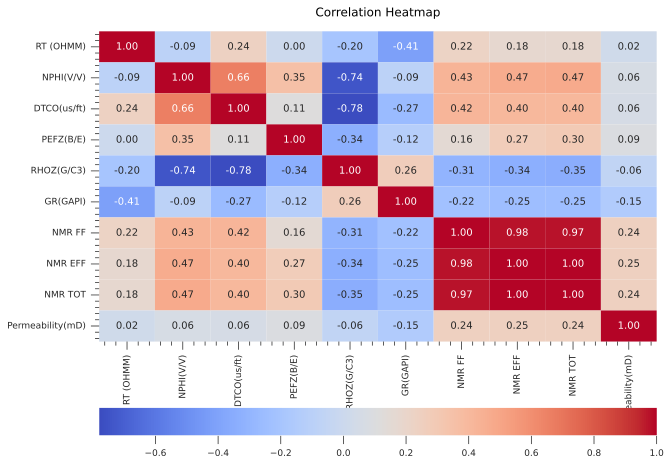

In [44]:
df_F = df_F[df_F['k'] > 0]   # Filter out rows with 'k' values less than or equal to zero

columns_of_interest = ["AT90", "NPHI", "DTCO", "PEFZ", "RHOZ", "GR", "NMRFF", "NMREFF", "NMRTOT", "k"]   # Select the columns of interest
df_F = df_F[columns_of_interest]

# Rename the columns with custom display names
df_F = df_F.rename(columns={
    "AT90": "RT (OHMM)",
    "NPHI": "NPHI(V/V)",
    "DTCO": "DTCO(us/ft)",
    "PEFZ": "PEFZ(B/E)",
    "RHOZ": "RHOZ(G/C3)",
    "GR": "GR(GAPI)",
    "NMRFF": "NMR FF",
    "NMREFF": "NMR EFF",
    "NMRTOT": "NMR TOT",
    "k": "Permeability(mD)"
})

# Calculate the correlation matrix
correlation_matrix = df_F.corr()

# Create a heatmap with horizontal property names on the vertical axis
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={"orientation": "horizontal"})

# Rotate the y-axis labels to be horizontal
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.title("Correlation Heatmap")
plt.show()


# ==========================================================

# Least Square - Support Vector Machine (LSSVM)

The Least Squares Support Vector Machine (LSSVM) is a variation of the original Support Vector Machine (SVM) in which we have a slight change in the objective and restriction functions that results in a big simplification of the optimization problem.

First, let's see the optimization problem of an SVM:

 
 
In this case, we have a set of inequality restrictions and when solving the optimization problem by it's dual we find a discriminative function, adding the kernel trick, of the type:

In [45]:
# Filter out rows with 'k' values less than or equal to zero
df = df[df['k'] > 0]

# Define X and y using specific columns after filtering
X = df[["RHOZ", "GR", "AT90", "NPHI", "DTCO", "PEFZ", "NMRFF", "NMREFF", "NMRTOT"]]   #  
y = df[["k"]]

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 2020)
print(X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(273, 9) (273, 1) (191, 9) (82, 9) (191, 1) (82, 1)


# Tuckey Method:

handle outliers before splitting your data into training and testing sets. This ensures that you are not introducing any data leakage from your test set into your training set during the outlier handling process.

Here's the recommended order of operations:

Handle Outliers: Clean your data by handling outliers using methods like Tukey fences.
Split Data: After handling outliers, split your data into training and testing sets.
Train-Test Split: Use the training set to train your model and the testing set to evaluate its performance.

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def tukey_fences(data_series, k=1.5):
    q1 = data_series.quantile(0.25)
    q3 = data_series.quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - k * iqr
    upper_fence = q3 + k * iqr
    return lower_fence, upper_fence

def handle_outliers(data_series, lower_fence, upper_fence):
    data_series[data_series < lower_fence] = lower_fence
    data_series[data_series > upper_fence] = upper_fence
    return data_series

# Set the Tukey's k value (you can adjust this based on your data)
k_value = 1.5

# List of predictors to clean
predictors = ["GR", "AT90", "NPHI", "RHOZ", "DTCO", "PEFZ", "NMRFF", "NMREFF", "NMRTOT"]

# Clean outliers in the training set for each predictor
for column_name in predictors:
    lower_fence, upper_fence = tukey_fences(X_train[column_name], k_value)
    X_train[column_name] = handle_outliers(X_train[column_name], lower_fence, upper_fence)

# Print the cleaned training set
X_train

,RHOZ,GR,AT90,NPHI,DTCO,PEFZ,NMRFF,NMREFF,NMRTOT
36,2.316428,11.838878,587.760130,0.193596,70.834785,5.665609,0.132105,0.180169,0.186374
3,2.275256,21.451315,20.509071,0.276277,67.033295,6.983316,0.079618,0.182904,0.189701
263,2.507634,23.859613,3.750170,0.134746,64.538475,4.828036,0.000935,0.001047,0.001205
224,2.658876,51.279949,19.568573,0.068073,56.656880,5.103761,0.000414,0.000628,0.000933
76,2.503616,47.247852,13.931621,0.195355,65.677864,5.032326,0.084256,0.131400,0.133400
...,...,...,...,...,...,...,...,...,...
131,2.531607,19.041885,21.623652,0.132813,57.581738,4.706828,0.099140,0.138795,0.139087
125,2.470652,19.556670,8.249541,0.169710,63.910168,5.289252,0.112414,0.135880,0.136062
91,2.385379,16.700560,312.180450,0.175155,66.544630,6.247816,0.131124,0.168356,0.175024
195,2.494667,26.923277,209.262650,0.121607,60.212600,4.731114,0.001268,0.001435,0.001435


In [48]:
y_values = y.values.reshape(-1, 1)    # Convert y to a NumPy array and reshape it

scaler_X = StandardScaler()    # Scale your features (X) and the target variable (y)
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

/Users/amirhosseinakhondzadeh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Defining LSSVR (Least Square Support Vector Regressor)

In [49]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.utils import check_X_y, check_array
from sklearn.exceptions import NotFittedError
from scipy.sparse.linalg import lsmr


class LSSVR(BaseEstimator, RegressorMixin):
    """Least Squares Support Vector Regression.

    Parameters
    ----------
    C : float, default=2.0
        Regularization parameter. The strength of the regularization is
        inversely proportional to C. Must be strictly positive.

    kernel : {'linear', 'rbf'}, default='linear'
        Specifies the kernel type to be used in the algorithm.
        It must be 'linear', 'rbf' or a callable.

    gamma : float, default = None
        Kernel coefficient for 'rbf'


    Attributes
    ----------
    support_: boolean np.array of shape (n_samples,), default = None
        Array for support vector selection.

    alpha_ : array-like
        Weight matrix

    bias_ : array-like
        Bias vector


    """

    def __init__(self, C=2.0, kernel='linear', gamma=None):
        self.C = C
        self.kernel = kernel
        self.gamma = gamma
        #self.degree = degree

    def fit(self, X, y, support=None):
        """Fit the model according to the given training data.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            Training data

        y : array-like of shape (n_samples,) or (n_samples, n_targets)
            Target values.

        support : boolean np.array of shape (n_samples,), default = None
            Array for support vector selection.

        Returns
        -------
        self : object
            An instance of the estimator.
        """

        X, y = check_X_y(X, y, multi_output=True, dtype='float')

        if not support:
            self.support_ = np.ones(X.shape[0], dtype=bool)
        else:
            self.support_ = check_array(support, ensure_2d=False, dtype='bool')

        self.support_vectors_ = X[self.support_, :]
        support_labels = y[self.support_]

        self.K_ = self.kernel_func(X, self.support_vectors_)
        omega = self.K_.copy()
        np.fill_diagonal(omega, omega.diagonal()+self.support_/self.C)

        D = np.empty(np.array(omega.shape) + 1)

        D[1:, 1:] = omega
        D[0, 0] = 0
        D[0, 1:] = 1
        D[1:, 0] = 1

        shape = np.array(support_labels.shape)
        shape[0] += 1
        t = np.empty(shape)

        t[0] = 0
        t[1:] = support_labels

        # TODO: maybe give access to  lsmr atol and btol ?
        try:
            z = lsmr(D.T, t)[0]
        except:
            z = np.linalg.pinv(D).T @ t

        self.bias_ = z[0]
        self.alpha_ = z[1:]
        self.alpha_ = self.alpha_[self.support_]

        return self

    def predict(self, X):
        """
        Predict using the estimator.
        Parameters
        ----------
        X : array-like or sparse matrix, shape (n_samples, n_features)
            Samples.

        Returns
        -------
        y : array-like of shape (n_samples,) or (n_samples, n_targets)
            Returns predicted values.
        """

        if not hasattr(self, 'support_vectors_'):
            raise NotFittedError

        X = check_array(X, ensure_2d=False)
        K = self.kernel_func(X, self.support_vectors_)
        return (K @ self.alpha_) + self.bias_

    def kernel_func(self, u, v):
        if self.kernel == 'linear':
            return np.dot(u, v.T)

        elif self.kernel == 'rbf':
            return rbf_kernel(u, v, gamma=self.gamma)

        elif callable(self.kernel):
            if hasattr(self.kernel, 'gamma'):
                return self.kernel(u, v, gamma=self.gamma)
            else:
                return self.kernel(u, v)
        else:
            # default to linear
            return np.dot(u, v.T)

    def score(self, X, y):
        from scipy.stats import pearsonr
        p, _ = pearsonr(y, self.predict(X))
        return p ** 2

    def norm_weights(self):
        A = self.alpha_.reshape(-1, 1) @ self.alpha_.reshape(-1, 1).T

        W = A @ self.K_[self.support_, :]
        return np.sqrt(np.sum(np.diag(W)))

# LSSVR

In [50]:
# Step 1: Instantiate the LSSVR model with desired parameters
model = LSSVR(C=40, kernel='rbf', gamma=1.6)  # Example parameters, adjust as needed

#degree=3, coef0=0.0, tol=1e-3

# Step 2: Fit the model with training data
model.fit(X_train_scaled, y_train_scaled)

LSSVR(C=40, gamma=1.6, kernel='rbf')

In [51]:
y_pred_LSSVR_scaled = model.predict(X_scaled)
#y_pred_svr_scaled = best_svr_model.predict(X_test_scaled)

# Inverse transform the scaled predictions to get the original scale
y_pred_lssvr = scaler_y.inverse_transform(y_pred_LSSVR_scaled.reshape(-1, 1))

In [10]:
"""y_pred_LSSVR_scaled = model.predict(X_test_scaled)
#y_pred_svr_scaled = best_svr_model.predict(X_test_scaled)

# Inverse transform the scaled predictions to get the original scale
y_pred_lssvr = scaler_y.inverse_transform(y_pred_LSSVR_scaled.reshape(-1, 1))"""

<function matplotlib.pyplot.show(close=None, block=None)>

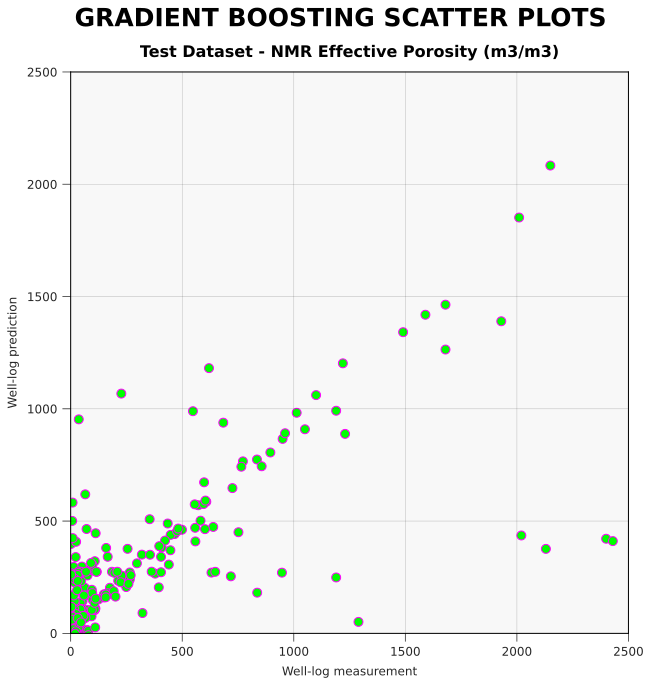

In [52]:
# Random Forest Scatter Plots 
fig, ax = plt.subplots(1,1, figsize=(10,10))
fig.suptitle("GRADIENT BOOSTING SCATTER PLOTS", fontsize=25, fontweight='bold')
fig.subplots_adjust(top=0.89,hspace=0.4)

#Set up the subplots grid
ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1) 

# First Scatter Plot
ax1.scatter(y,y_pred_lssvr, s=80, c='lime', edgecolors='magenta')
#ax1.scatter(y_test,y_pred_lssvr, s=80, c='lime', edgecolors='magenta')

ax1.set_xlabel('Well-log measurement', fontsize=12) 
ax1.set_ylabel('Well-log prediction', fontsize=12)
ax1.set_title('Test Dataset - NMR Effective Porosity (m3/m3)', fontsize=16, fontweight='bold')
#ax1.semilogy()                                                           # x in a log scale
#ax1.semilogx()                                                           # x in a log scale
ax1.set_xlim(0,2500)
ax1.set_ylim(0,2500)
#ax1.set_xticks(np.arange(0, 0.25, 0.025))
#ax1.set_yticks(np.arange(0, 0.25, 0.025))

# Add a black border to each subplot
for ax in [ax1]:
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    
# Set font size of the tick labels
for ax in [ax1]:
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    
# Set grid 
for ax in [ax1]:
    ax.grid(color='black',lw=0.5)

plt.show

# ==========================================================

# LSSVR + cuckoo optimization algorithm (COA)

In [53]:
from skopt import gp_minimize
from skopt.space import Real
from sklearn.metrics import mean_squared_error

# Define the objective function for skopt
def objective_function_skopt(params):
    C_value = params[0]
    gamma_value = params[1]
    
    # Create and train LSSVM with the given hyperparameters
    lssvr = LSSVR(C=C_value, gamma=gamma_value, kernel='rbf')
    lssvr.fit(X_train_scaled, y_train_scaled)
    
    # Predict on validation set
    y_pred = lssvr.predict(X)
    
    # Evaluate performance (mean squared error in this case)
    mse = mean_squared_error(y, y_pred)
    
    return mse

# Define the search space for hyperparameters
space_skopt = [Real(1, 100, name='C'),   # Search space for C
               Real(0.1, 1.0, name='gamma')]  # Search space for gamma

# Run Bayesian optimization using skopt to minimize the objective function
result_skopt = gp_minimize(objective_function_skopt, space_skopt, n_calls=50, random_state=42)

# Retrieve the best hyperparameters from skopt result
best_params_skopt = result_skopt.x
best_C_skopt = best_params_skopt[0]
best_gamma_skopt = best_params_skopt[1]

# Apply the optimized parameters to LSSVM
lssvr_skopt = LSSVR(C=best_C_skopt, gamma=best_gamma_skopt, kernel='rbf')
lssvr_skopt.fit(X_train_scaled, y_train_scaled)


LSSVR(C=100.0, gamma=0.41661880911452953, kernel='rbf')

In [56]:
y_pred_LSSVR_scaled = lssvr_skopt.predict(X_scaled)
#y_pred_svr_scaled = best_svr_model.predict(X_test_scaled)

# Inverse transform the scaled predictions to get the original scale
y_pred_lssvr = scaler_y.inverse_transform(y_pred_LSSVR_scaled.reshape(-1, 1))

<function matplotlib.pyplot.show(close=None, block=None)>

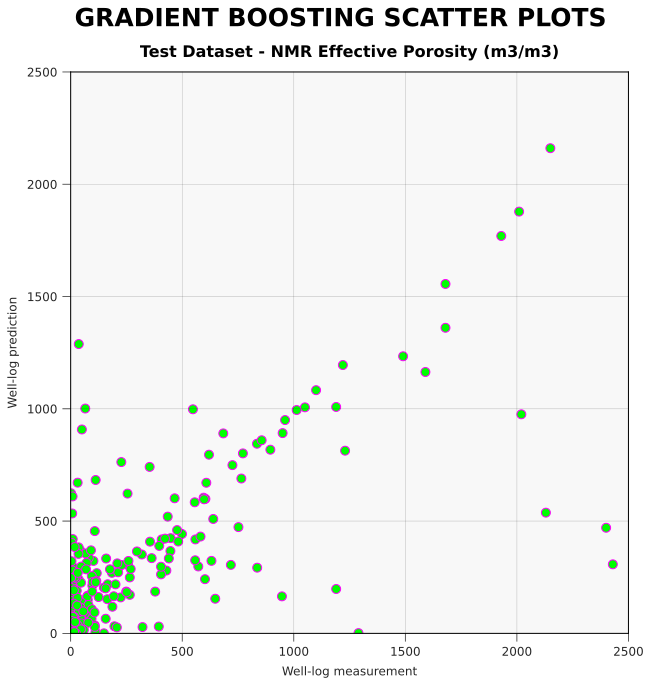

In [57]:
# Random Forest Scatter Plots 
fig, ax = plt.subplots(1,1, figsize=(10,10))
fig.suptitle("GRADIENT BOOSTING SCATTER PLOTS", fontsize=25, fontweight='bold')
fig.subplots_adjust(top=0.89,hspace=0.4)

#Set up the subplots grid
ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1) 

# First Scatter Plot
ax1.scatter(y,y_pred_lssvr, s=80, c='lime', edgecolors='magenta')
#ax1.scatter(y_test,y_pred_lssvr, s=80, c='lime', edgecolors='magenta')

ax1.set_xlabel('Well-log measurement', fontsize=12) 
ax1.set_ylabel('Well-log prediction', fontsize=12)
ax1.set_title('Test Dataset - NMR Effective Porosity (m3/m3)', fontsize=16, fontweight='bold')
#ax1.semilogy()                                                           # x in a log scale
#ax1.semilogx()                                                           # x in a log scale
ax1.set_xlim(0,2500)
ax1.set_ylim(0,2500)
#ax1.set_xticks(np.arange(0, 0.25, 0.025))
#ax1.set_yticks(np.arange(0, 0.25, 0.025))

# Add a black border to each subplot
for ax in [ax1]:
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    
# Set font size of the tick labels
for ax in [ax1]:
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    
# Set grid 
for ax in [ax1]:
    ax.grid(color='black',lw=0.5)

plt.show

# ==========================================================